In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from mcopt.pipeline import Pipeline
from mcopt import ot, MorseGraph

# Load Morse Complexes

In [3]:
pipeline = Pipeline('../pipeline.config.json')

In [4]:
mc = pipeline.complex('sinusoidal').frames[0]

mc_noisy = pipeline.complex('sinusoidal_noisy').frames[0]

> Loading sinusoidal complex
  config unchanged, reading complex


> Loading sinusoidal_noisy complex
  config unchanged, reading complex


# Construct Morse Graphs

In [5]:
mg = mc.to_graph().sample(7)
mg_noisy = mc_noisy.to_graph().sample(7)

mh = mg.to_hyper()
mh_noisy = mg_noisy.to_hyper()

Text(0.5, 1.0, 'Sinusoidal noisy')

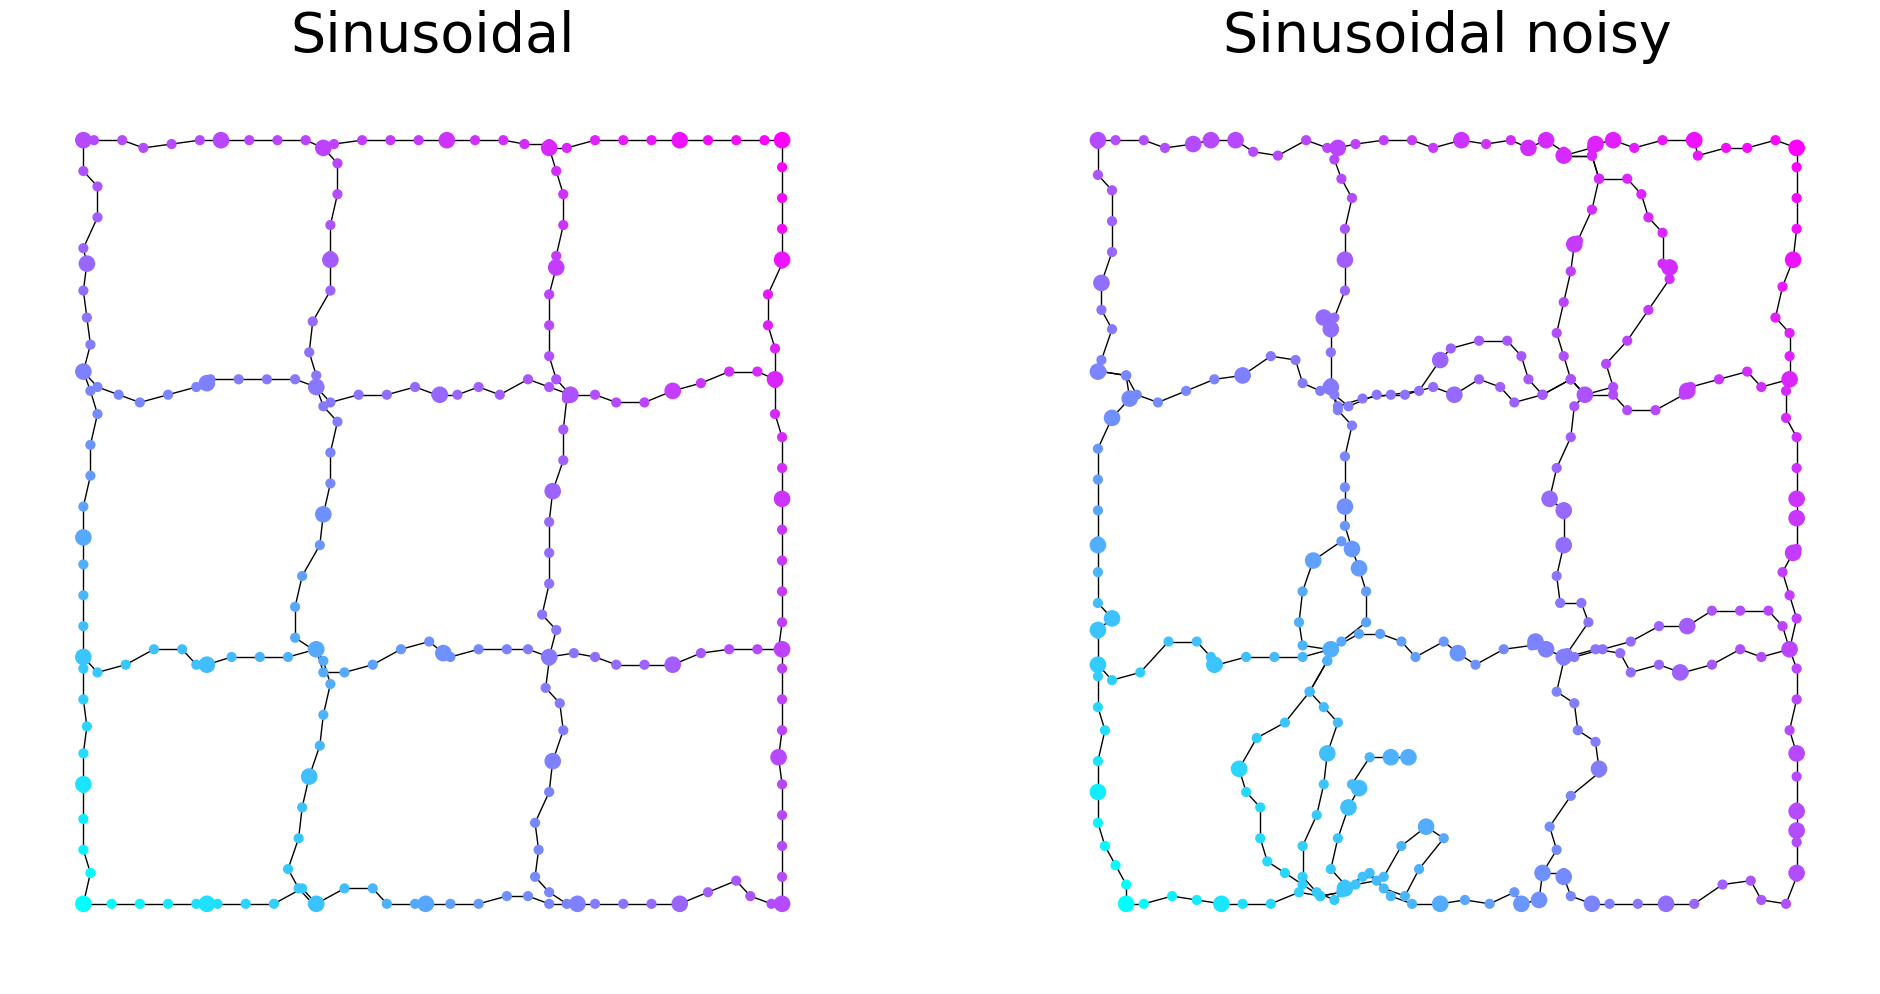

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axes[0], cmap=cmap)
axes[0].set_title('Sinusoidal', fontsize=40)

mg_noisy.draw(ax=axes[1], cmap=cmap)
axes[1].set_title('Sinusoidal noisy', fontsize=40)

# Perform Co-Optional Transport

## Construct Metric Measure Hypernetworks

In [7]:
mh_net = mh.to_mph()
mh_noisy_net = mh_noisy.to_mph()

## COOT GW

In [8]:
node_coupling, edge_coupling, _ = ot.cGW(mh_net, mh_noisy_net, random_G0 = True, random_state = 42)

Text(0.5, 1.0, 'Destination Graph (cGW)')

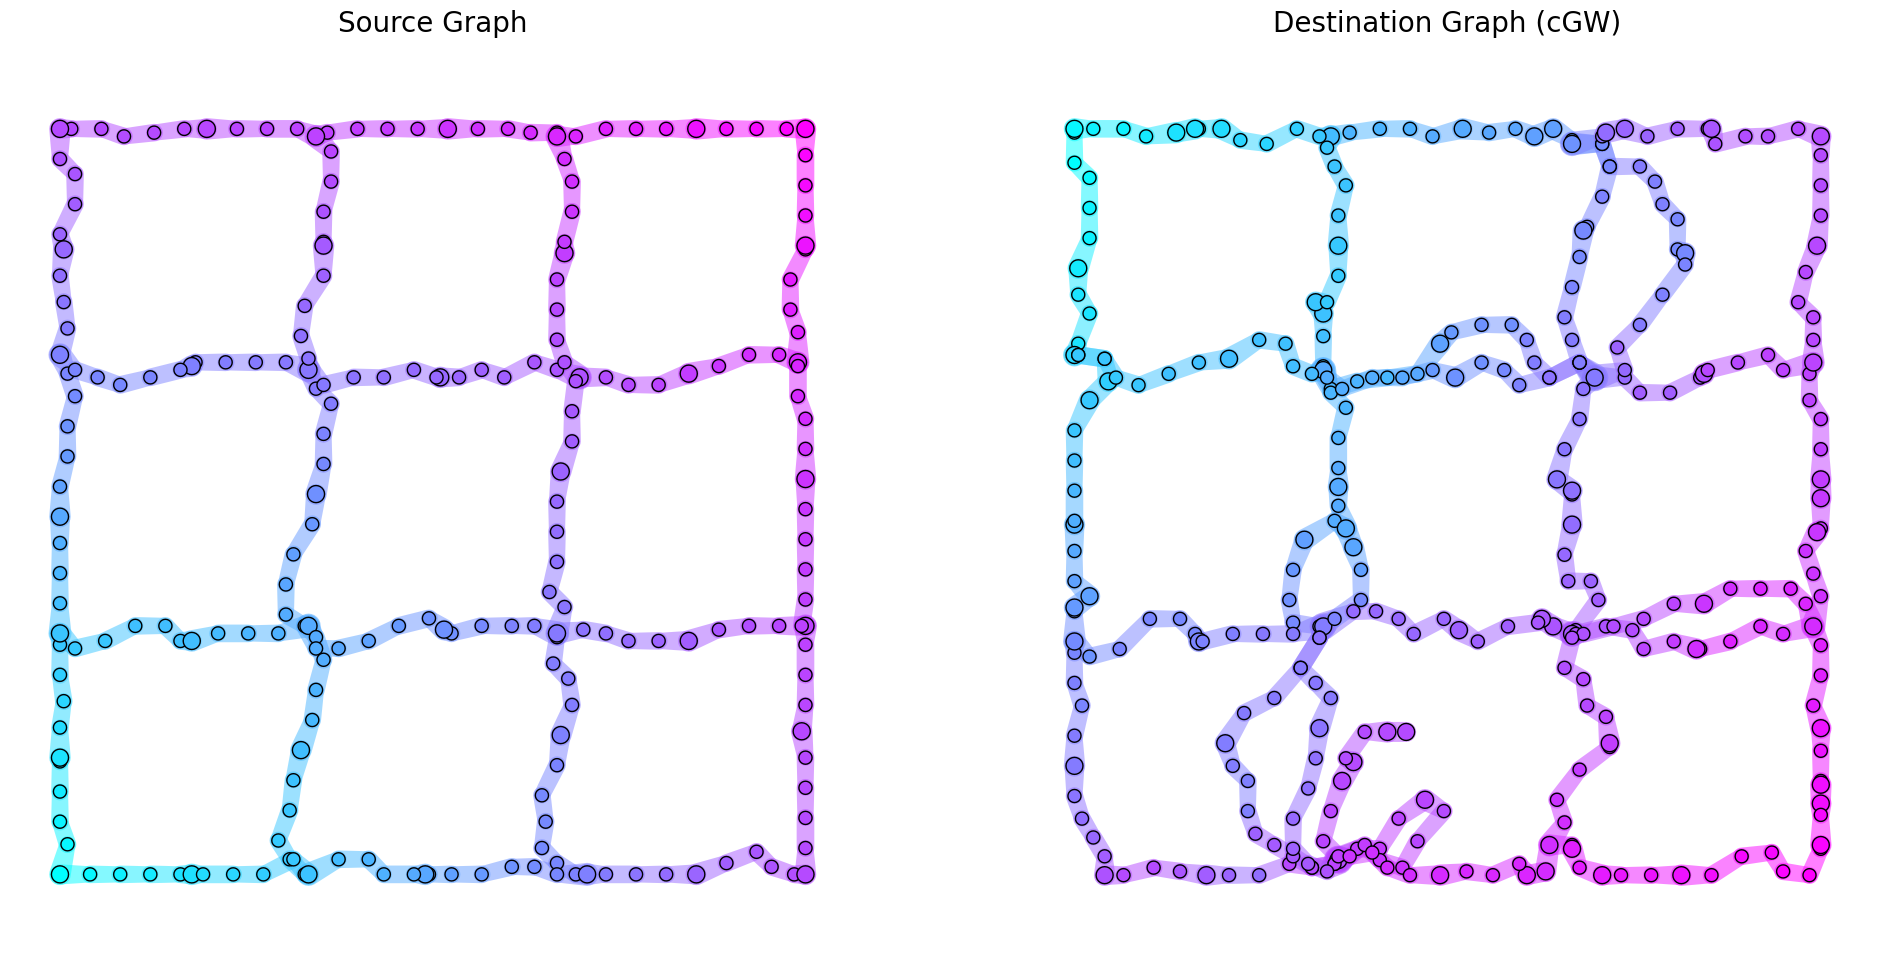

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mh_node_color = mh.node_color_by_position()
mh_edge_color = mh.edge_color_by_node(mh_node_color)
mh.draw(
  ax=axes[0],
  cmap=cmap,
  node_color=mh_node_color,
  edge_color=mh_edge_color
)
axes[0].set_title('Source Graph', fontsize=20)

mh_noisy.draw(
  ax=axes[1],
  cmap=cmap,
  node_color=mh_noisy.node_color_by_coupling(mh_node_color, node_coupling),
  edge_color=mh_noisy.edge_color_by_coupling(mh_edge_color, edge_coupling),
)
axes[1].set_title('Destination Graph (cGW)', fontsize=20)